# Imports

In [45]:
from tensorflow import keras
import glob
import PIL
import PIL.Image as Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
class_names = ["buildings","glacier  ","forest   ","mountain ","sea      ", "street   "]

## Functions

get_imgs(fnames, label=None) [image names] -> (ndarray[images], label)
    if no label is specified returns images

load_dataset(datadir='') datadir -> ([images], [labels])

predict(img) image -> label
    img must be an ndarray

In [43]:
def get_imgs(fnames, label=None):
    data = [np.asarray(Image.open(fname)) for fname in fnames]
    for idx, d in enumerate(data):
        if(d.shape[0] != d.shape[1]):
            data.pop(idx)
    if label == None:
        return np.array(data)
    labels = np.full((len(data),1),label)
    return np.array(data), labels

def load_dataset(datadir=''):
    buildings, l1 = get_imgs(glob.glob(datadir + "/buildings/*"),0)
    glacier, l2 = get_imgs(glob.glob(datadir + "/glacier/*"),1)
    forest, l3 = get_imgs(glob.glob(datadir + "/forest/*"),2)
    mountain, l4 = get_imgs(glob.glob(datadir + "/mountain/*"),3)
    sea, l5 = get_imgs(glob.glob(datadir + "/sea/*"),4)
    street, l6 = get_imgs(glob.glob(datadir + "/street/*"),5)
    labels = np.concatenate((l1,l2,l3,l4,l5,l6))
    data = np.concatenate((buildings,glacier,forest,mountain,sea,street))
    return data,labels

def predict(img):
    prediction = model.predict(img.reshape((1,150,150,3)))
    result = ""
    for i in range(len(prediction[0])):
        result += class_names[i] + "\t {:.2%}".format(prediction[0][i]) + "\n"
    return result
    # return class_names[np.argmax(prediction,axis=1)[0]] + "{:.0%}".format(np.max(prediction))

## **Training**

In [63]:
# Load training and test data
data,labels = load_dataset("archive/seg_train/seg_train")
test, tlabel = load_dataset("archive/seg_test/seg_test")
print(data.shape,labels.shape)
print(test.shape,tlabel.shape)

(13986, 150, 150, 3) (13986, 1)
(2993, 150, 150, 3) (2993, 1)


In [96]:
# Model Initialization
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(150,150, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
# model.add(keras.layers.MaxPooling2D((2, 2)))
# model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
# model.add(keras.layers.MaxPooling2D((2, 2)))
# model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(6,activation='softmax'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 flatten_5 (Flatten)         (None, 73984)            

In [ ]:
# Model Training
history = model.fit(data, labels, epochs=20, validation_data=(test,tlabel))

In [ ]:
# Plotting model accuracy vs epoch
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.ylim(0.2,1)
plt.yticks(np.arange(0.1, 1, step=0.1))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## **Testing**

In [3]:
# Load prediction images, unlabeled
images = get_imgs(glob.glob("archive/seg_pred/seg_pred/*"))

# load saved model
# model = keras.models.load_model("5Layers_64.keras")

1/1 [==============================] - 0s 16ms/step
buildings 0.00%
glacier 0.00%
forest 100.00%
mountain 0.00%
sea 0.00%
street 0.00%



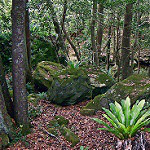

In [41]:
# Example of prediction on an image from model
img = images[26]
print(predict(img))
Image.fromarray(img)

1/1 [==============================] - 0s 15ms/step
buildings	 80.63%
glacier  	 0.26%
forest   	 0.01%
mountain 	 0.01%
sea      	 0.62%
street   	 18.48%



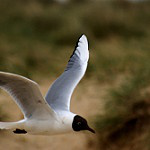

In [61]:
img = get_imgs(["archive/seg_pred/seg_pred/7158.jpg"])[0]
print(predict(img))
Image.fromarray(img)